In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

output_forcing_file = 'KONZ_met_forcing_2019-2020.csv'

pcp_dir = './forcing/daily_precip/NEON.D06.KONZ.DP1.00044.001.900.000.01D.WEIPRE_daily'
wx_dir = './forcing/daily_wx/'
tmp_dir = wx_dir+'NEON.D06.KONZ.DP4.00001.001.000.040.01D.wss_daily_temp' # Temperature data
prs_dir = wx_dir+'NEON.D06.KONZ.DP4.00001.001.000.035.01D.wss_daily_pres' # Pressure data
srd_dir = wx_dir+'NEON.D06.KONZ.DP4.00001.001.000.040.01D.wss_daily_shortRad' # Solar radiation data
hmd_dir = wx_dir+'NEON.D06.KONZ.DP4.00001.001.000.040.01D.wss_daily_humid' # Humidity data
wnd_dir = wx_dir+'NEON.D06.KONZ.DP4.00001.001.000.020.01D.wss_daily_wind' # Wind speed data

pcp_varname = 'precipBulk' # Precipitation, mm
tmean_varname = 'wssTempTripleMean' # Mean temperature, °C
tmin_varname = 'wssTempTripleMinimum' # Minimum temperature, °C
tmax_varname = 'wssTempTripleMaximum' # Maximum temperature, °C
press_varname = 'wssStaPresMean' # Pressure, kPa
srad_varname = 'wssShortRadMean' # Shortwave radiation, W/m^2
humid_varname = 'wssRHMean' # Relative humidity, %
wind_varname = 'wssWindSpeedMean' # 2D wind speed, m/s

<AxesSubplot: xlabel='date'>

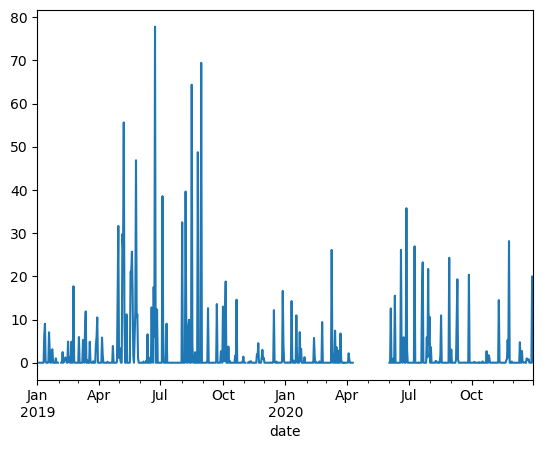

In [2]:
# Precip Data
pcp_files = glob.glob(pcp_dir+'*')

li = []
for file in pcp_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
    
df_pcp = pd.concat(li, axis=0, ignore_index=True)

df_pcp['date'] = pd.to_datetime(df_pcp['date'])
df_pcp = df_pcp.set_index('date')
df_pcp = df_pcp.sort_values(by='date')

df_pcp[pcp_varname].plot()

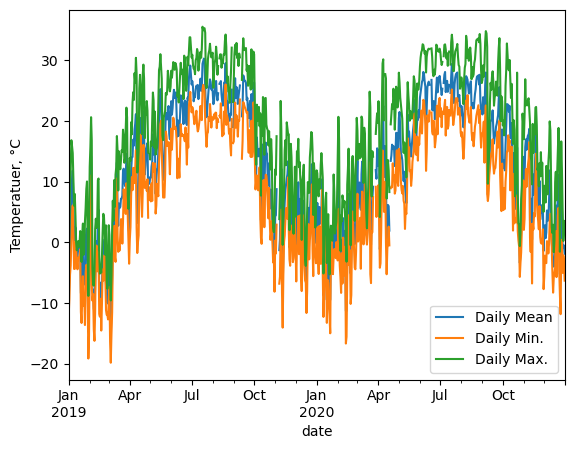

In [3]:

# Temperature Data
tmp_files = glob.glob(tmp_dir+'*')

li = []
for file in tmp_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
    
df_tmp = pd.concat(li, axis=0, ignore_index=False)

df_tmp['date'] = pd.to_datetime(df_tmp['date'])
df_tmp = df_tmp.set_index('date')
df_tmp = df_tmp.sort_values(by='date')

df_tmp[tmean_varname].plot(label='Daily Mean')
df_tmp[tmin_varname].plot(label='Daily Min.')
df_tmp[tmax_varname].plot(label='Daily Max.')
plt.ylabel('Temperatuer, °C')
plt.legend()

Text(0, 0.5, 'Air Pressure, kPa')

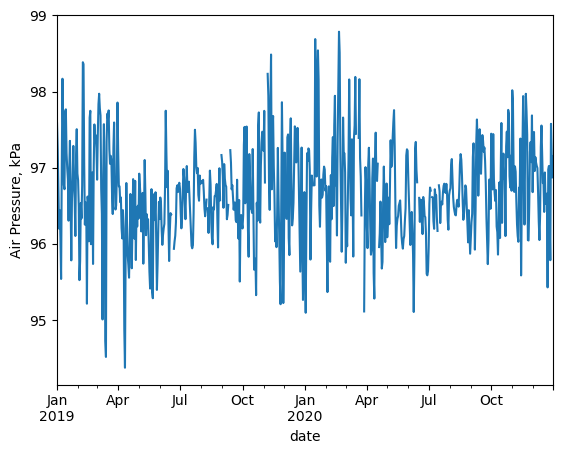

In [4]:
# Pressure data
prs_files = glob.glob(prs_dir+'*')

li = []
for file in prs_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
    
df_prs = pd.concat(li, axis=0, ignore_index=True)

df_prs['date'] = pd.to_datetime(df_prs['date'])
df_prs = df_prs.set_index('date')
df_prs = df_prs.sort_values(by='date')

df_prs[press_varname].plot()
plt.ylabel('Air Pressure, kPa')

Text(0, 0.5, 'Solar radiation, W/m^2')

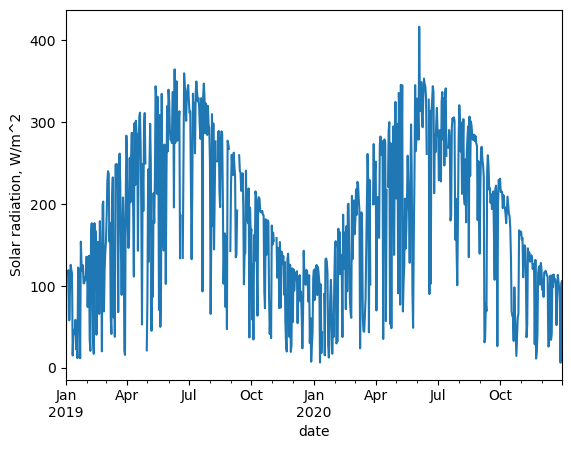

In [5]:

# Solar radiation data
srd_files = glob.glob(srd_dir+'*')

li = []
for file in srd_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
    
df_srd = pd.concat(li, axis=0, ignore_index=True)

df_srd['date'] = pd.to_datetime(df_srd['date'])
df_srd = df_srd.set_index('date')
df_srd = df_srd.sort_values(by='date')

df_srd[srad_varname].plot()
plt.ylabel('Solar radiation, W/m^2')

Text(0, 0.5, 'Relative Humidity, %')

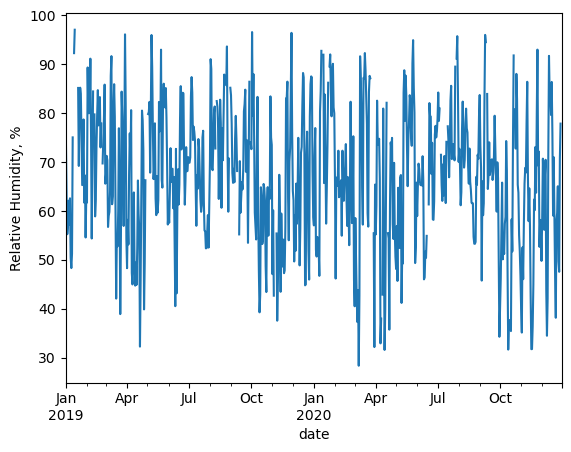

In [6]:

# Humidity data
hmd_files = glob.glob(hmd_dir+'*')

li = []
for file in hmd_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
    
df_hmd = pd.concat(li, axis=0, ignore_index=True)

df_hmd['date'] = pd.to_datetime(df_hmd['date'])
df_hmd = df_hmd.set_index('date')
df_hmd = df_hmd.sort_values(by='date')

df_hmd[humid_varname].plot()
plt.ylabel('Relative Humidity, %')

Text(0, 0.5, 'Wind Speed, m/s')

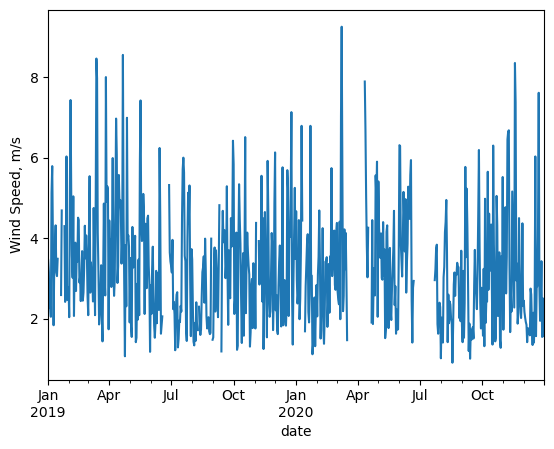

In [7]:

# Humidity data
wnd_files = glob.glob(wnd_dir+'*')

li = []
for file in wnd_files:
    df = pd.read_csv(file, index_col=None, header=0)
    li.append(df)
    
df_wnd = pd.concat(li, axis=0, ignore_index=True)

df_wnd['date'] = pd.to_datetime(df_wnd['date'])
df_wnd = df_wnd.set_index('date')
df_wnd = df_wnd.sort_values(by='date')

df_wnd[wind_varname].plot()
plt.ylabel('Wind Speed, m/s')

In [8]:
df_forcing = pd.concat([
     df_pcp[pcp_varname],
     df_tmp[tmean_varname],
     df_tmp[tmin_varname],
     df_tmp[tmax_varname],
     df_prs[press_varname],
     df_hmd[humid_varname],
     df_srd[srad_varname],
     df_wnd[wind_varname]
    ],
    axis=1
)

df_forcing.set_index(df_pcp.index)

df_forcing = df_forcing.rename(columns={
    pcp_varname: 'prcp',
    tmean_varname: 'tmean',
    tmin_varname: 'tmin',
    tmax_varname: 'tmax',
    press_varname: 'airp',
    humid_varname: 'relh',
    srad_varname: 'srad',
    wind_varname: 'wspd'
})

df_forcing.head()

,prcp,tmean,tmin,tmax,airp,relh,srad,wspd
date,,,,,,,,
2019-01-01,0.0,-10.1503,-12.1679,-6.0444,97.58324,74.63,42.66,3.46
2019-01-02,0.0,-5.4802,-9.4820,2.4182,97.24513,63.25,118.95,3.16
2019-01-03,0.0,0.5755,-5.3251,9.0519,96.70277,55.24,117.79,2.27
2019-01-04,0.0,3.5899,-3.8342,11.9848,96.20039,57.00,118.12,2.30
2019-01-05,0.0,7.1416,-0.0214,16.8382,96.44219,62.09,119.35,2.05


In [9]:
# Impute missing precipitation
imputer_iterative = IterativeImputer(max_iter=100, random_state=1, n_nearest_features=300, imputation_order='random', min_value=0.0, sample_posterior=True)

df_forcing['prcp_iterative_imputed'] = imputer_iterative.fit_transform(df_forcing[['prcp']])

# Impute missing temperature
imputer_iterative = IterativeImputer(max_iter=100, random_state=1)

df_forcing[['tmean_iterative_imputed', 
            'tmax_iterative_imputed', 
            'tmin_iterative_imputed']] = imputer_iterative.fit_transform(
                df_forcing[['tmean', 
                            'tmin', 
                            'tmax']])

# Impute missing air pressure
imputer_iterative = IterativeImputer(max_iter=100, random_state=1, min_value=0.0)

df_forcing['airp_iterative_imputed'] = imputer_iterative.fit_transform(df_forcing[['airp']])

# Impute missing relative humidity
imputer_iterative = IterativeImputer(max_iter=100, random_state=1, min_value=0.0, max_value=100.0)

df_forcing['relh_iterative_imputed'] = imputer_iterative.fit_transform(df_forcing[['relh']])

# Impute missing relative humidity
imputer_iterative = IterativeImputer(max_iter=100, random_state=1, min_value=0.0)

df_forcing['srad_iterative_imputed'] = imputer_iterative.fit_transform(df_forcing[['srad']])


# Impute missing relative humidity
imputer_iterative = IterativeImputer(max_iter=100, random_state=1,min_value=0.0)

df_forcing['wspd_iterative_imputed'] = imputer_iterative.fit_transform(df_forcing[['wspd']])

df_forcing

,prcp,tmean,tmin,tmax,airp,relh,srad,wspd,prcp_iterative_imputed,tmean_iterative_imputed,tmax_iterative_imputed,tmin_iterative_imputed,airp_iterative_imputed,relh_iterative_imputed,srad_iterative_imputed,wspd_iterative_imputed
date,,,,,,,,,,,,,,,,
2019-01-01,0.00,-10.1503,-12.1679,-6.0444,97.58324,74.63,42.66,3.46,0.00,-10.1503,-12.1679,-6.0444,97.58324,74.630000,42.66,3.46
2019-01-02,0.00,-5.4802,-9.4820,2.4182,97.24513,63.25,118.95,3.16,0.00,-5.4802,-9.4820,2.4182,97.24513,63.250000,118.95,3.16
2019-01-03,0.00,0.5755,-5.3251,9.0519,96.70277,55.24,117.79,2.27,0.00,0.5755,-5.3251,9.0519,96.70277,55.240000,117.79,2.27
2019-01-04,0.00,3.5899,-3.8342,11.9848,96.20039,57.00,118.12,2.30,0.00,3.5899,-3.8342,11.9848,96.20039,57.000000,118.12,2.30
2019-01-05,0.00,7.1416,-0.0214,16.8382,96.44219,62.09,119.35,2.05,0.00,7.1416,-0.0214,16.8382,96.44219,62.090000,119.35,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.00,5.9811,0.4286,11.9590,95.78568,47.55,96.95,3.43,0.00,5.9811,0.4286,11.9590,95.78568,47.550000,96.95,3.43
2020-12-28,0.00,-0.6431,-5.0310,5.4344,97.57665,70.66,77.99,1.55,0.00,-0.6431,-5.0310,5.4344,97.57665,70.660000,77.99,1.55
2020-12-29,20.01,-0.8201,-2.1484,0.2248,97.17474,77.86,6.33,2.51,20.01,-0.8201,-2.1484,0.2248,97.17474,77.860000,6.33,2.51


In [10]:
df_forcing_continuous = pd.concat([
    df_forcing['prcp_iterative_imputed'],
    df_forcing['tmean_iterative_imputed'],
    df_forcing['tmin_iterative_imputed'],
    df_forcing['tmax_iterative_imputed'],
    df_forcing['airp_iterative_imputed'],
    df_forcing['relh_iterative_imputed'],
    df_forcing['srad_iterative_imputed'],
    df_forcing['wspd_iterative_imputed']
  ],
axis=1
)

df_forcing_continuous.set_index(df_forcing.index)

df_forcing_continuous = df_forcing_continuous.rename(columns={
    'prcp_iterative_imputed': 'prcp',
    'tmean_iterative_imputed': 'tmean',
    'tmin_iterative_imputed': 'tmin',
    'tmax_iterative_imputed': 'tmax',
    'airp_iterative_imputed': 'airp',
    'relh_iterative_imputed': 'relh',
    'srad_iterative_imputed': 'srad',
    'wspd_iterative_imputed': 'wspd'
})

df_forcing_continuous.head()

,prcp,tmean,tmin,tmax,airp,relh,srad,wspd
date,,,,,,,,
2019-01-01,0.0,-10.1503,-6.0444,-12.1679,97.58324,74.63,42.66,3.46
2019-01-02,0.0,-5.4802,2.4182,-9.4820,97.24513,63.25,118.95,3.16
2019-01-03,0.0,0.5755,9.0519,-5.3251,96.70277,55.24,117.79,2.27
2019-01-04,0.0,3.5899,11.9848,-3.8342,96.20039,57.00,118.12,2.30
2019-01-05,0.0,7.1416,16.8382,-0.0214,96.44219,62.09,119.35,2.05


In [11]:
df_forcing_continuous.to_csv(output_forcing_file)


Text(0, 0.5, 'Precipitation [mm]')

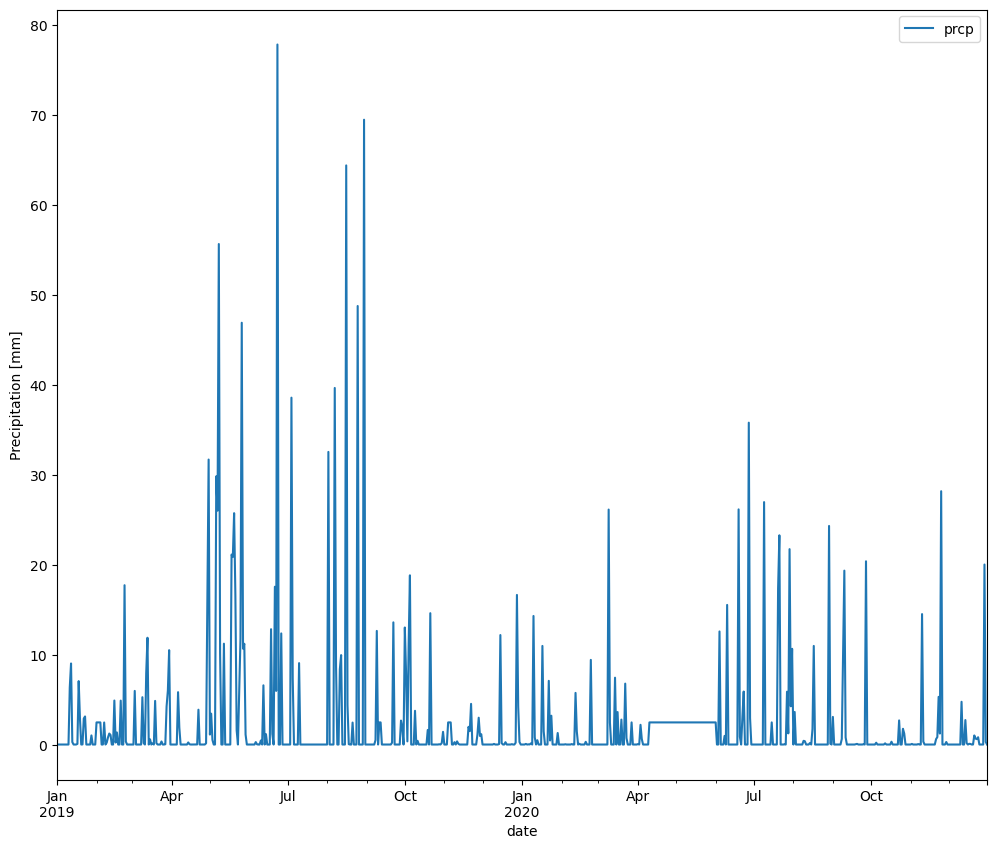

In [12]:
df_forcing_continuous.plot(figsize=(12,10),y='prcp')
plt.ylabel('Precipitation [mm]')

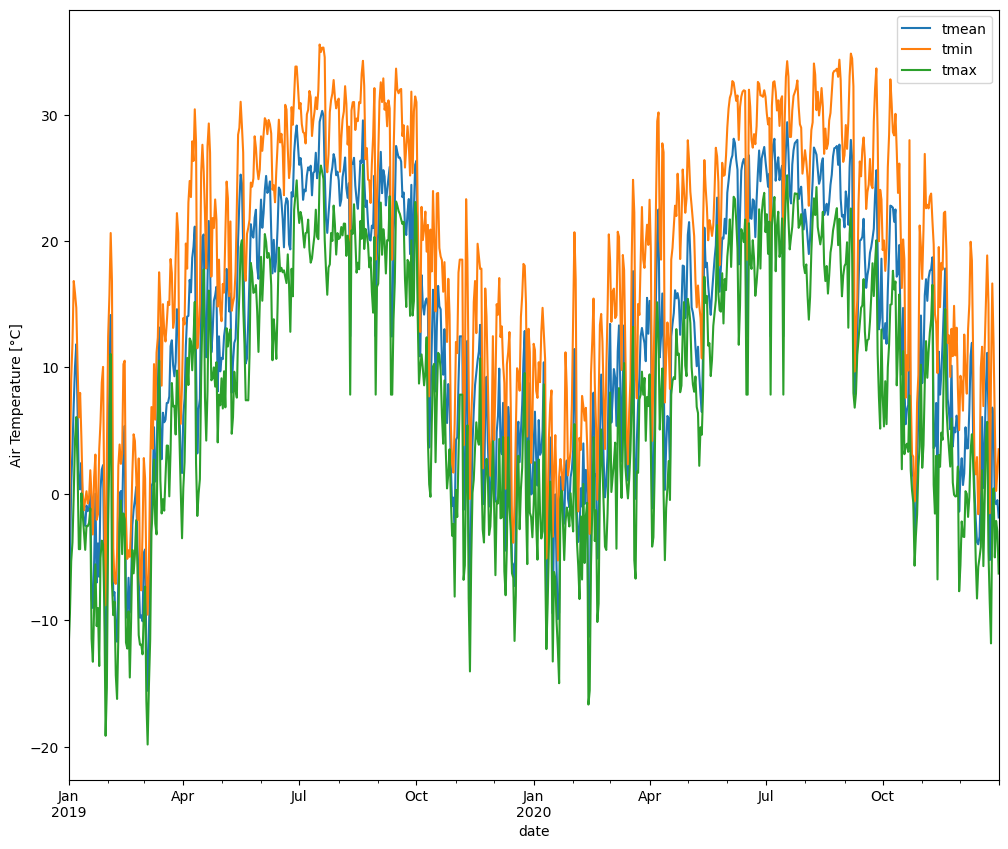

In [13]:
df_forcing_continuous.plot(figsize=(12,10),y=['tmean','tmin','tmax'])
plt.ylabel('Air Temperature [°C]')
plt.legend()

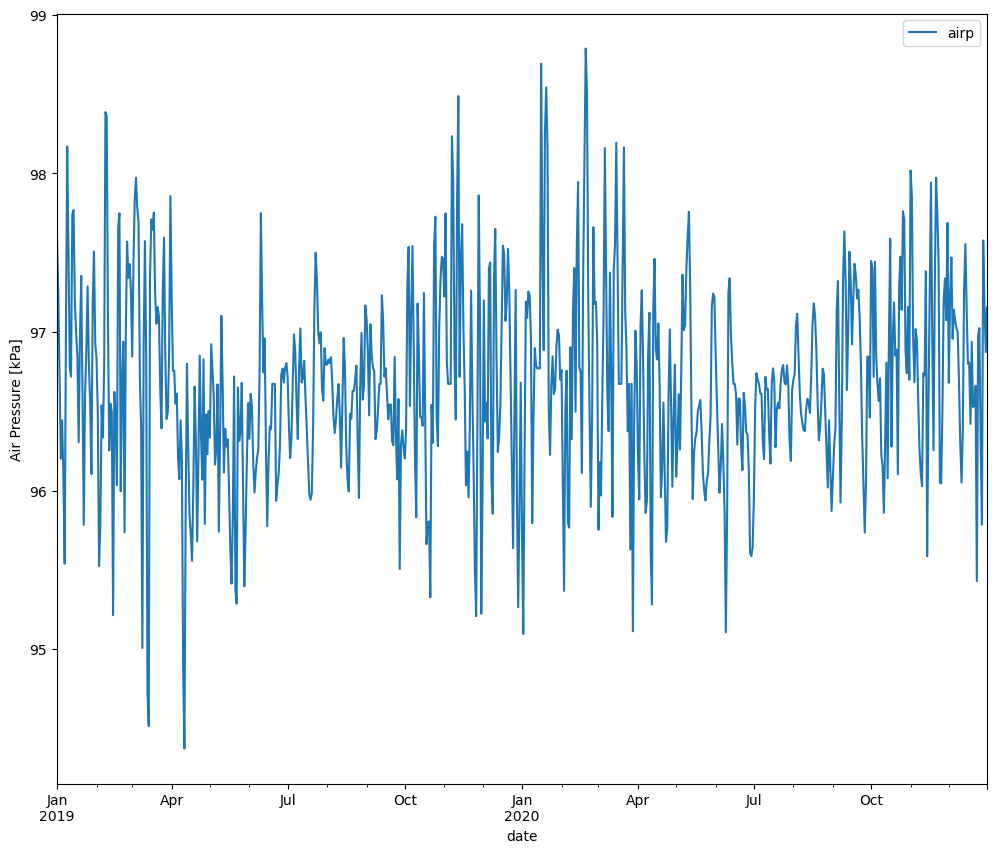

In [14]:
df_forcing_continuous.plot(figsize=(12,10),y='airp')
plt.ylabel('Air Pressure [kPa]')
plt.legend()

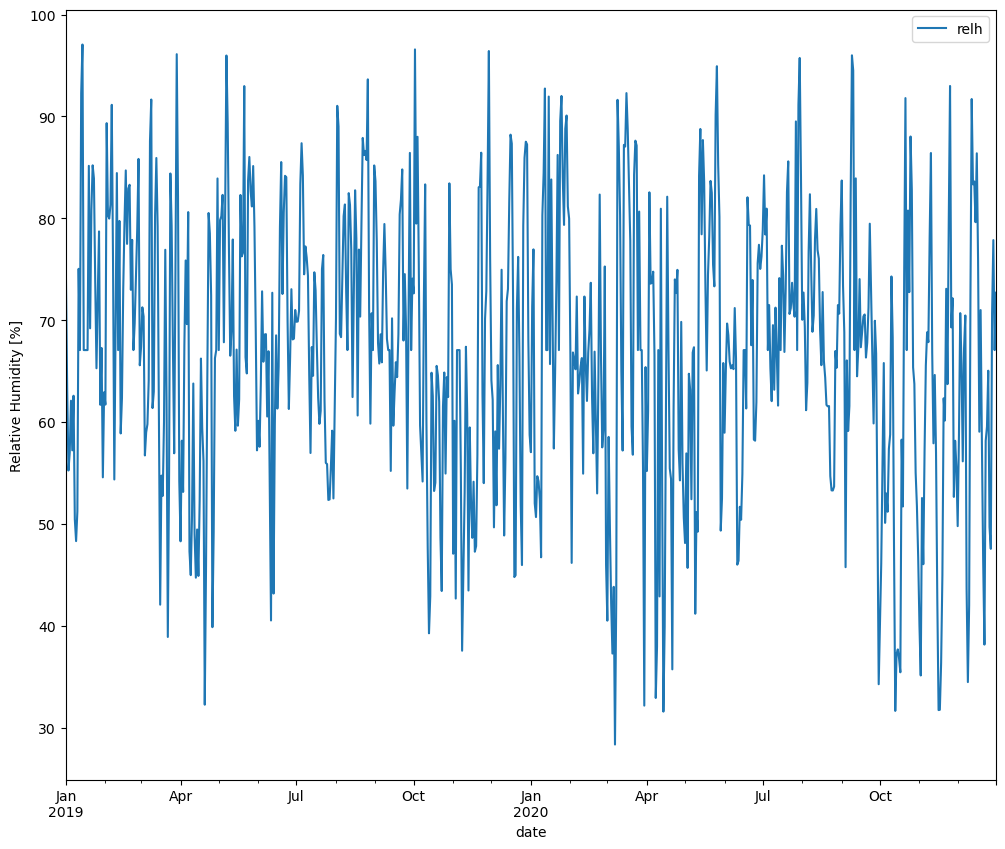

In [15]:
df_forcing_continuous.plot(figsize=(12,10),y='relh')
plt.ylabel('Relative Humidity [%]')
plt.legend()

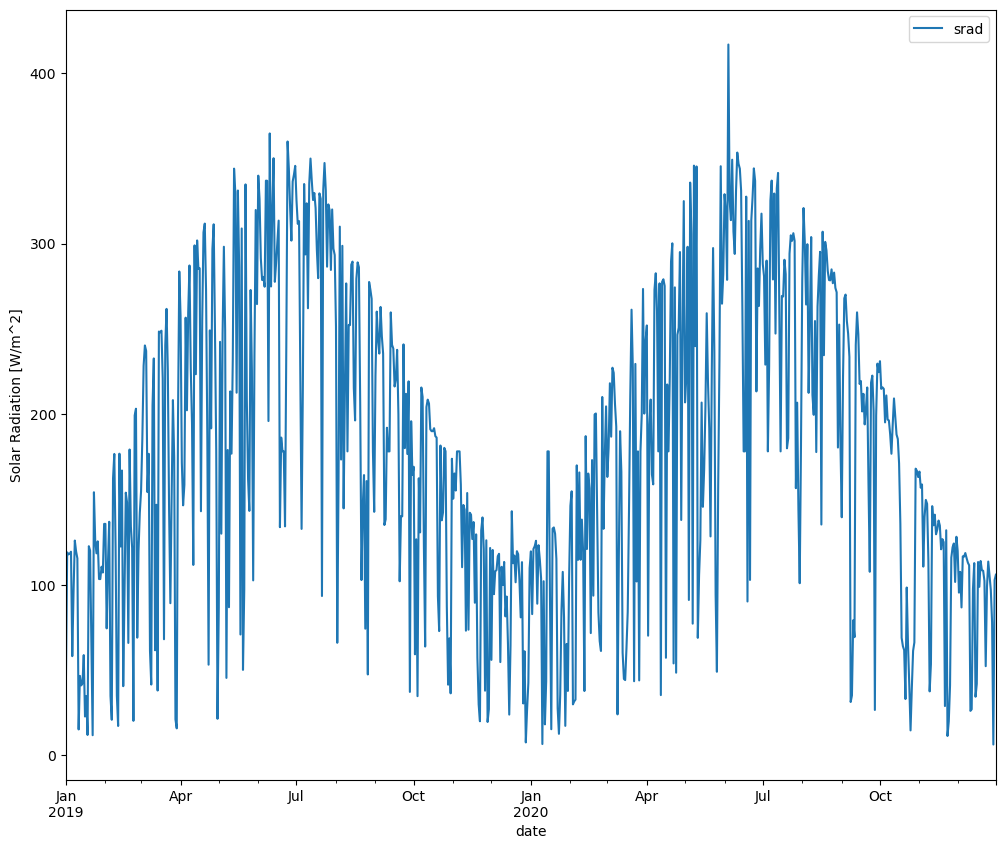

In [16]:
df_forcing_continuous.plot(figsize=(12,10),y='srad')
plt.ylabel('Solar Radiation [W/m^2]')
plt.legend()

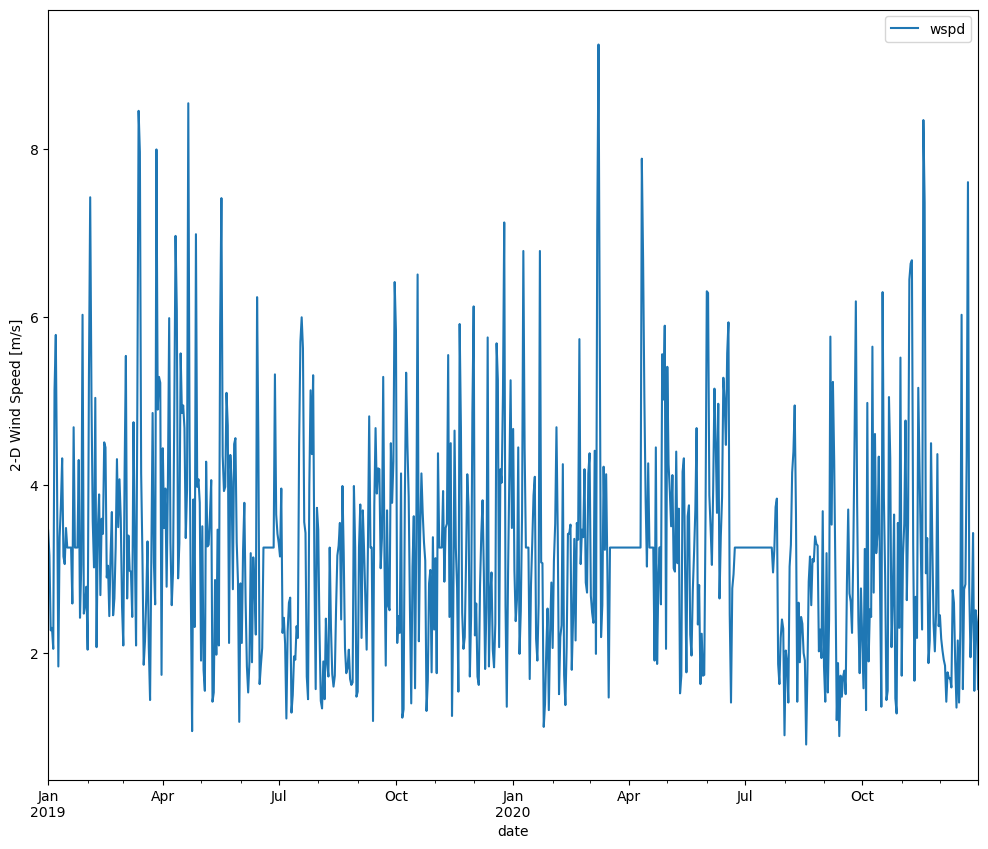

In [17]:
df_forcing_continuous.plot(figsize=(12,10),y='wspd')
plt.ylabel('2-D Wind Speed [m/s]')
plt.legend()